# Ted Talk Preliminary Exploration
Basic Statistical Analysis on **TED Talks**

In [1]:
# Import libraries
import nltk
import pandas as pd 
import math 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json
import nltk
import re 
import os 
import codecs


from textblob import TextBlob

# Configure display
pd.options.display.max_rows = 100
pd.options.display.max_columns = 30
sns.set()
warnings.filterwarnings('ignore')
plt.ylim(0, 1)

# Configure run
%matplotlib inline

## Helper Functions
Various helper functions for data manipulation and analysis

In [2]:
def remove_name(title):
    '''Remove the name of the speaker from the start of the talk title'''
    cleaned_title = ''
    flag = False
    for word in nltk.word_tokenize(title):
        if (word == ':'):
            flag = True 
        elif flag: 
            cleaned_title = cleaned_title + word + ' '
    return cleaned_title

def get_mean(iter_data):
    '''Get the mean of an iterable form of data'''
    return sum(iter_data)/len(iter_data)

## Processing & Cleaning Data

In [3]:
# Import data
ted_main = pd.read_csv('ted_main.csv', sep=',')
display(ted_main.head(2))

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520


In [4]:
ted_transcripts = pd.read_csv('transcripts.csv', sep=',')
display(ted_transcripts.head(5))

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [5]:
# Process + Clean the Data

ted_df = ted_main.merge(ted_transcripts, left_on='url', right_on='url', how='outer')
ted_df = ted_df.dropna()

del ted_main, ted_transcripts

display(ted_df.head(2))

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre..."


## Sentiment Analysis on TED Talks

In [6]:
# TED Talk Title Sentiment Analysis

named_sent = pd.DataFrame(columns = {'polarity', 'subjectivity'})
unnamed_sent = pd.DataFrame(columns = {'polarity', 'subjectivity'})

for title in ted_df['name']:
    ted_blob = TextBlob(title)
    named_sent = named_sent.append({'polarity': ted_blob.sentiment.polarity,'subjectivity': ted_blob.sentiment.subjectivity}, ignore_index=True)
    unnamed_title = remove_name(title)
    ted_blob = TextBlob(unnamed_title)
    unnamed_sent = unnamed_sent.append({'polarity': ted_blob.sentiment.polarity,'subjectivity': ted_blob.sentiment.subjectivity}, ignore_index=True)


In [7]:
# Sentiment means
print('Mean of Unnamed Polarity: ' + str(get_mean(unnamed_sent['polarity'])))
print('Mean of Unnamed Subjectivty: ' + str(get_mean(unnamed_sent['subjectivity'])))

Mean of Unnamed Polarity: 0.05102386195681601
Mean of Unnamed Subjectivty: 0.204454533524627


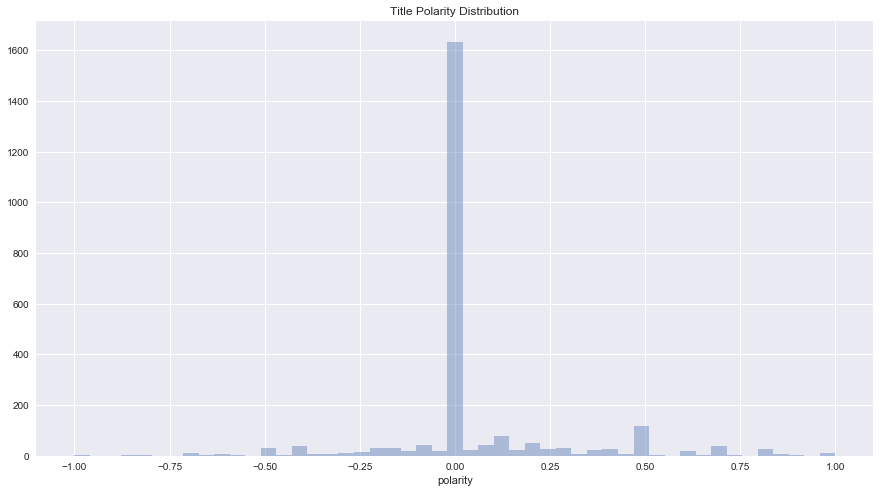

In [8]:
matplotlib.rcParams['figure.figsize'] = (15,8)
ax = sns.distplot(unnamed_sent['polarity'], kde=False, hist=True).set_title('Title Polarity Distribution')
# ax.set(ylim=(0, 100))

Based on this plot, we can see that most TED Talk titles are neutral and are neither negative or positive.

Text(0.5,1,'Title Subjectivity Distribution')

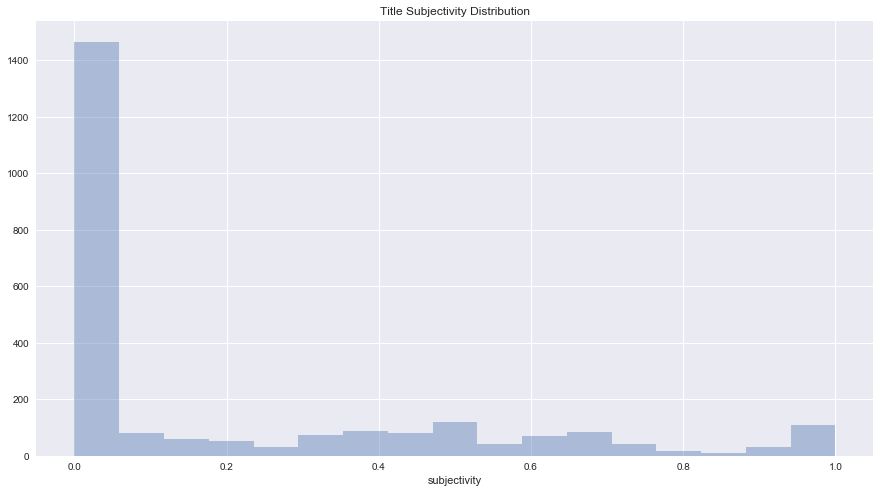

In [9]:
sns.distplot(unnamed_sent['subjectivity'], hist=True,kde=False).set_title('Title Subjectivity Distribution')

Based on this graph, we can see that most TED Talk titles are objective.

In [10]:
# Sentiment analysis on the transcripts of the TED Talk 

trans_sent = pd.DataFrame(columns = {'polarity', 'subjectivity'})

for trans in ted_df['transcript']:
    ted_blob = TextBlob(trans)
    trans_sent = trans_sent.append({'polarity': ted_blob.sentiment.polarity,'subjectivity': ted_blob.sentiment.subjectivity}, ignore_index=True)

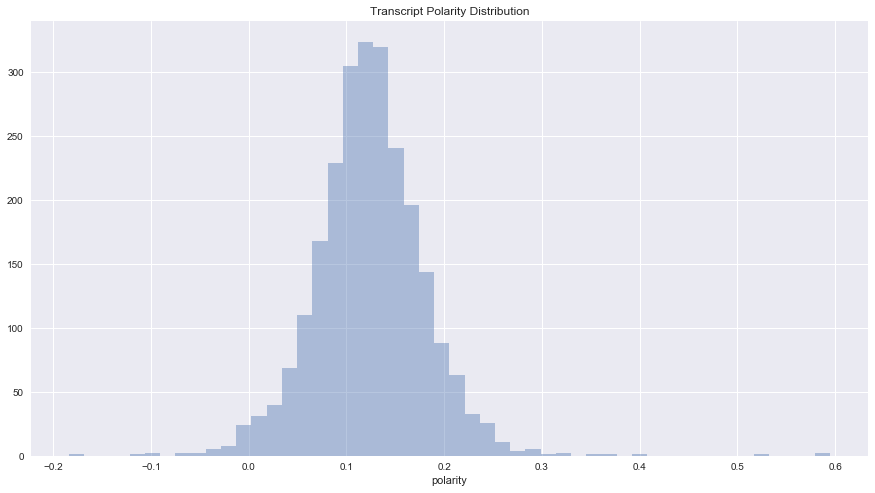

In [11]:
ax = sns.distplot(trans_sent['polarity'], kde=False, hist=True).set_title('Transcript Polarity Distribution')

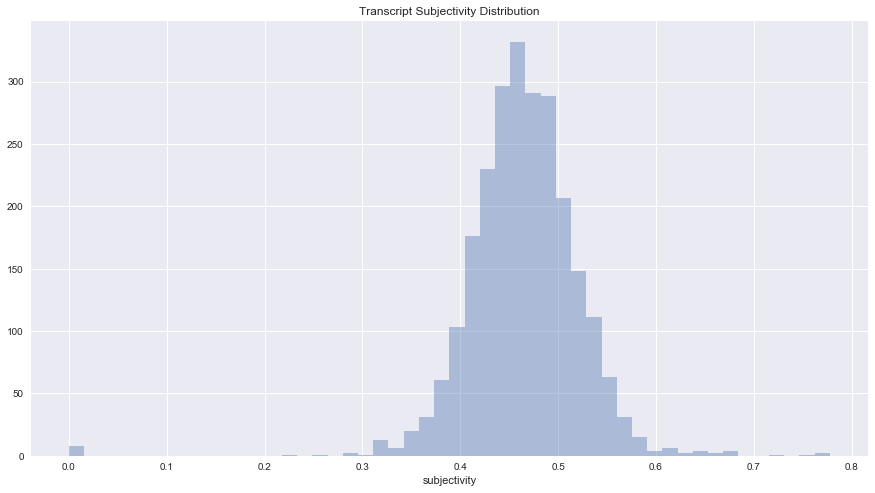

In [12]:
ax = sns.distplot(trans_sent['subjectivity'], kde=False, hist=True).set_title('Transcript Subjectivity Distribution')

## Correlations Between Sentiment and Number of Views

In [13]:
trans_sent.columns = ['transcript_polarity', 'transcript_subjectivity']
unnamed_sent.columns = ['title_polarity', 'title_subjectivity']

ted_df = pd.concat([ted_df,trans_sent], axis=1)
ted_df = pd.concat([ted_df,unnamed_sent], axis=1)

In [14]:
# Linear Correlations b/w Sentiment and Views
print('Correlation between # of Views and Title Polarity: ' + str(ted_df['views'].corr(ted_df['title_polarity'])))
print('Correlation between # of Views and Title Subjectivity: ' + str(ted_df['views'].corr(ted_df['title_subjectivity'])))
print('Correlation between # of Views and Transcript Polarity: ' + str(ted_df['views'].corr(ted_df['transcript_polarity'])))
print('Correlation between # of Views and Transcript Subjectivity: ' + str(ted_df['views'].corr(ted_df['transcript_subjectivity'])))

Correlation between # of Views and Title Polarity: 0.0124723337115
Correlation between # of Views and Title Subjectivity: 0.0318708913739
Correlation between # of Views and Transcript Polarity: -0.00343020856206
Correlation between # of Views and Transcript Subjectivity: 0.0263587123003


Therefore, there is **no linear relationship** between the number of views and the sentiment of the title or transcript of the TED Talk. 